In [70]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Optimizer
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint

In [71]:
train=pd.read_csv("veriler\datathon\\train.csv")
test=pd.read_csv("veriler\datathon\\testFeatures.csv")

In [72]:
sutunisimler=["tarih","urun","besin","kategori","fiyat","uretimyeri","market","sehir"]
train.columns=sutunisimler

In [73]:
sutunisimler=["id","tarih","urun","besin","kategori","uretimyeri","market","sehir"]
test.columns=sutunisimler

In [74]:
grup1 = ["urun_Bakla-kuru","urun_Bamya","urun_Barbunya-kuru","urun_Domates","urun_Fasulye-kuru","urun_Fasulye-taze","urun_Havuç","urun_Salatalık","urun_Kabak","urun_Karnabahar",
            "urun_Kereviz-baş","urun_Kırmızı-pancar","urun_Lahana","urun_Marul","urun_Mercimek-kuru","urun_Nohut","urun_Pancar","urun_Patates","urun_Patlıcan","urun_Pazı",
            "urun_Pırasa","urun_Semizotu","urun_Buğday ekmeği","urun_Bulgur","urun_Erişte","urun_Makarna","urun_Mısır","urun_Nişasta","urun_Pilav","urun_Pirinç unu","urun_Şehriye",
            "urun_Tarhana","urun_yumurta","urun_krema","urun_tam buğday ekmek","urun_Armut","urun_Çilek","urun_Elma","urun_Erik türleri","urun_İncir","urun_Karadut","urun_Karpuz",
            "urun_Kavun","urun_Kayısı","urun_Kiraz","urun_Limon","urun_Mandalina","urun_Muz","urun_Nar","urun_Portakal","urun_Şeftali","urun_Üzüm","urun_Vişne"]

grup2 = ["urun_tavuk","urun_hindi","urun_Bakla-taze","urun_Bezelye-taze","urun_Biber-yeşil","urun_Enginar","urun_Ispanak","urun_Mantar",
            "urun_Mısır unu","urun_Yulaf unu","urun_beyaz peynir","urun_Kaşar peyniri","urun_yoğurt","urun_sucuk","urun_salam","urun_sosis",
            "urun_kaymak","urun_tereyağ","urun_fındık","urun_fıstık","urun_kaju","urun_badem","urun_ceviz"]

grup3 = ["urun_kıyma","urun_Brüksel laha.","urun_bal"]

In [64]:
on    = train[train['urun'].isin(grup1)]
yirmi = train[train['urun'].isin(grup2)]
otuz  = train[train['urun'].isin(grup3)]

In [69]:
otuz.head()

,tarih,urun,besin,kategori,fiyat,uretimyeri,market,sehir
0,2016-01-01,kıyma,120,et,33.41,Yurt içi,M,A
9,2016-01-01,Brüksel laha.,47,sebze ve bakliyat,23.53,Yurt içi,M,A
54,2016-01-01,bal,400,süt ürünleri ve kahvaltılık,25.62,Yurt içi,M,A
79,2016-01-01,kıyma,120,et,33.71,Yurt dışı,M,A
88,2016-01-01,Brüksel laha.,47,sebze ve bakliyat,23.17,Yurt dışı,M,A


In [ ]:
df.drop(df[df['Age'] < 25].index, inplace = True)

In [94]:
tarih2016.loc[0].index

Index(['fiyat', 'urun_Armut', 'urun_Bakla-kuru', 'urun_Bakla-taze',
       'urun_Bamya', 'urun_Barbunya-kuru', 'urun_Bezelye-taze',
       'urun_Biber-yeşil', 'urun_Brüksel laha.', 'urun_Bulgur',
       ...
       'mart', 'nisan', 'mayis', 'haziran', 'temmuz', 'agustos', 'eylul',
       'ekim', 'kasim', 'aralik'],
      dtype='object', length=111)

In [75]:
tarih2016=train.iloc[:45503,:]
tarih2017=train.iloc[45504:91008,:]
tarih2018=train.iloc[91008:136512,:]
tarih2019=train.iloc[136512:182016,:]
tarih2020=train.iloc[182016:,:]

In [76]:
one_hot = pd.get_dummies(test[['tarih','urun','kategori','uretimyeri','market','sehir']])
test = test.drop(["id",'tarih','urun','kategori','uretimyeri','market','sehir','besin'],axis = 1)

test = test.join(one_hot)
test.rename(columns={'tarih_2021-01-01': 'ocak', 'tarih_2021-02-01': 'subat', 'tarih_2021-03-01': 'mart'
                        , 'tarih_2021-04-01': 'nisan', 'tarih_2021-05-01': 'mayis', 'tarih_2021-06-01': 'haziran'
                        , 'tarih_2021-07-01': 'temmuz', 'tarih_2021-08-01': 'agustos', 'tarih_2021-09-01': 'eylul'
                        , 'tarih_2021-10-01': 'ekim', 'tarih_2021-11-01': 'kasim', 'tarih_2021-12-01': 'aralik'}, inplace=True)

In [77]:
one_hot = pd.get_dummies(tarih2016[['tarih','urun','kategori','uretimyeri','market','sehir']])
tarih2016 = tarih2016.drop(['tarih','urun','kategori','uretimyeri','market','sehir','besin'],axis = 1)

tarih2016 = tarih2016.join(one_hot)
tarih2016.rename(columns={'tarih_2016-01-01': 'ocak', 'tarih_2016-02-01': 'subat', 'tarih_2016-03-01': 'mart'
                         , 'tarih_2016-04-01': 'nisan', 'tarih_2016-05-01': 'mayis', 'tarih_2016-06-01': 'haziran'
                         , 'tarih_2016-07-01': 'temmuz', 'tarih_2016-08-01': 'agustos', 'tarih_2016-09-01': 'eylul'
                         , 'tarih_2016-10-01': 'ekim', 'tarih_2016-11-01': 'kasim', 'tarih_2016-12-01': 'aralik'}, inplace=True)

In [78]:
one_hot = pd.get_dummies(tarih2017[['tarih','urun','kategori','uretimyeri','market','sehir']])
tarih2017 = tarih2017.drop(['tarih','urun','kategori','uretimyeri','market','sehir','besin'],axis = 1)

tarih2017 = tarih2017.join(one_hot)
tarih2017.rename(columns={'tarih_2017-01-01': 'ocak', 'tarih_2017-02-01': 'subat', 'tarih_2017-03-01': 'mart'
                         , 'tarih_2017-04-01': 'nisan', 'tarih_2017-05-01': 'mayis', 'tarih_2017-06-01': 'haziran'
                         , 'tarih_2017-07-01': 'temmuz', 'tarih_2017-08-01': 'agustos', 'tarih_2017-09-01': 'eylul'
                         , 'tarih_2017-10-01': 'ekim', 'tarih_2017-11-01': 'kasim', 'tarih_2017-12-01': 'aralik'}, inplace=True)

In [79]:
one_hot = pd.get_dummies(tarih2018[['tarih','urun','kategori','uretimyeri','market','sehir']])
tarih2018 = tarih2018.drop(['tarih','urun','kategori','uretimyeri','market','sehir','besin'],axis = 1)

tarih2018 = tarih2018.join(one_hot)
tarih2018.rename(columns={'tarih_2018-01-01': 'ocak', 'tarih_2018-02-01': 'subat', 'tarih_2018-03-01': 'mart'
                         , 'tarih_2018-04-01': 'nisan', 'tarih_2018-05-01': 'mayis', 'tarih_2018-06-01': 'haziran'
                         , 'tarih_2018-07-01': 'temmuz', 'tarih_2018-08-01': 'agustos', 'tarih_2018-09-01': 'eylul'
                         , 'tarih_2018-10-01': 'ekim', 'tarih_2018-11-01': 'kasim', 'tarih_2018-12-01': 'aralik'}, inplace=True)

In [80]:
one_hot = pd.get_dummies(tarih2019[['tarih','urun','kategori','uretimyeri','market','sehir']])
tarih2019 = tarih2019.drop(['tarih','urun','kategori','uretimyeri','market','sehir','besin'],axis = 1)

tarih2019 = tarih2019.join(one_hot)
tarih2019.rename(columns={'tarih_2019-01-01': 'ocak', 'tarih_2019-02-01': 'subat', 'tarih_2019-03-01': 'mart'
                         , 'tarih_2019-04-01': 'nisan', 'tarih_2019-05-01': 'mayis', 'tarih_2019-06-01': 'haziran'
                         , 'tarih_2019-07-01': 'temmuz', 'tarih_2019-08-01': 'agustos', 'tarih_2019-09-01': 'eylul'
                         , 'tarih_2019-10-01': 'ekim', 'tarih_2019-11-01': 'kasim', 'tarih_2019-12-01': 'aralik'}, inplace=True)

In [81]:
one_hot = pd.get_dummies(tarih2020[['tarih','urun','kategori','uretimyeri','market','sehir']])
tarih2020 = tarih2020.drop(['tarih','urun','kategori','uretimyeri','market','sehir','besin'],axis = 1)

tarih2020 = tarih2020.join(one_hot)
tarih2020.rename(columns={'tarih_2020-01-01': 'ocak', 'tarih_2020-02-01': 'subat', 'tarih_2020-03-01': 'mart'
                         , 'tarih_2020-04-01': 'nisan', 'tarih_2020-05-01': 'mayis', 'tarih_2020-06-01': 'haziran'
                         , 'tarih_2020-07-01': 'temmuz', 'tarih_2020-08-01': 'agustos', 'tarih_2020-09-01': 'eylul'
                         , 'tarih_2020-10-01': 'ekim', 'tarih_2020-11-01': 'kasim', 'tarih_2020-12-01': 'aralik'}, inplace=True)

In [82]:
aylar=['ocak', 'subat', 'mart', 'nisan','mayis','haziran', 'temmuz','agustos', 'eylul', 'ekim', 'kasim', 'aralik']
i=61
for ay in aylar:
    frame="demo"+str(ay)
    frame=test[test[ay]==1].iloc[:,0:1]
    frame[str(ay)]=i
    test.drop(ay,axis=1,inplace=True)
    test=pd.concat([test,frame],axis=1)
    i+=1
test=test.fillna(0)

'''aylartest=test.iloc[:,92:]
test.drop(aylar,axis=1,inplace=True)
test=pd.concat([aylartest,test],axis=1)'''

'aylartest=test.iloc[:,92:]\ntest.drop(aylar,axis=1,inplace=True)\ntest=pd.concat([aylartest,test],axis=1)'

In [83]:
aylar=['ocak', 'subat', 'mart', 'nisan','mayis','haziran', 'temmuz','agustos', 'eylul', 'ekim', 'kasim', 'aralik']
i=1
for ay in aylar:
        frame="demo"+str(ay)
        frame=tarih2016[tarih2016[ay]==1].iloc[:,1:2]
        frame[str(ay)]=i
        tarih2016.drop(ay,axis=1,inplace=True)
        tarih2016=pd.concat([tarih2016,frame],axis=1)
        i+=1
tarih2016=tarih2016.fillna(0)

In [84]:
aylar=['ocak', 'subat', 'mart', 'nisan','mayis','haziran', 'temmuz','agustos', 'eylul', 'ekim', 'kasim', 'aralik']
i=13
for ay in aylar:
    frame="demo"+str(ay)
    frame=tarih2017[tarih2017[ay]==1].iloc[:,1:2]
    frame[str(ay)]=i
    tarih2017.drop(ay,axis=1,inplace=True)
    tarih2017=pd.concat([tarih2017,frame],axis=1)
    i+=1
tarih2017=tarih2017.fillna(0)

In [85]:
aylar=['ocak', 'subat', 'mart', 'nisan','mayis','haziran', 'temmuz','agustos', 'eylul', 'ekim', 'kasim', 'aralik']
i=25
for ay in aylar:
    frame="demo"+str(ay)
    frame=tarih2018[tarih2018[ay]==1].iloc[:,1:2]
    frame[str(ay)]=i
    tarih2018.drop(ay,axis=1,inplace=True)
    tarih2018=pd.concat([tarih2018,frame],axis=1)
    i+=1
tarih2018=tarih2018.fillna(0)

In [86]:
aylar=['ocak', 'subat', 'mart', 'nisan','mayis','haziran', 'temmuz','agustos', 'eylul', 'ekim', 'kasim', 'aralik']
i=37
for ay in aylar:
    frame="demo"+str(ay)
    frame=tarih2019[tarih2019[ay]==1].iloc[:,1:2]
    frame[str(ay)]=i
    tarih2019.drop(ay,axis=1,inplace=True)
    tarih2019=pd.concat([tarih2019,frame],axis=1)
    i+=1
tarih2019=tarih2019.fillna(0)

In [87]:
aylar=['ocak', 'subat', 'mart', 'nisan','mayis','haziran', 'temmuz','agustos', 'eylul', 'ekim', 'kasim', 'aralik']
i=49
for ay in aylar:
    frame="demo"+str(ay)
    frame=tarih2020[tarih2020[ay]==1].iloc[:,1:2]
    frame[str(ay)]=i
    tarih2020.drop(ay,axis=1,inplace=True)
    tarih2020=pd.concat([tarih2020,frame],axis=1)
    i+=1
tarih2020=tarih2020.fillna(0)

In [88]:
frames = [tarih2016, tarih2017, tarih2018,tarih2019,tarih2020]
result = pd.concat(frames, ignore_index=False)

In [89]:
result.head(-5)

,fiyat,urun_Armut,urun_Bakla-kuru,urun_Bakla-taze,urun_Bamya,urun_Barbunya-kuru,urun_Bezelye-taze,urun_Biber-yeşil,urun_Brüksel laha.,urun_Bulgur,...,mart,nisan,mayis,haziran,temmuz,agustos,eylul,ekim,kasim,aralik
0,33.41,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11.22,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11.12,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.02,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13.14,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227510,26.24,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0
227511,14.20,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0
227512,15.16,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0
227513,16.22,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0


In [21]:
test

,urun_Armut,urun_Bakla-kuru,urun_Bakla-taze,urun_Bamya,urun_Barbunya-kuru,urun_Bezelye-taze,urun_Biber-yeşil,urun_Brüksel laha.,urun_Bulgur,urun_Buğday ekmeği,...,mart,nisan,mayis,haziran,temmuz,agustos,eylul,ekim,kasim,aralik
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45499,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0
45500,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0
45501,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0
45502,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0


In [171]:
y=result.iloc[:,0:1]
x=result.drop(['fiyat'],axis = 1)

In [172]:
model=Sequential()
model.add(Dense(256,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(1))

In [173]:
rmse = tf.keras.metrics.RootMeanSquaredError()

In [174]:
model.compile(optimizer="Adam",loss="mse",metrics=[rmse,'mae'])

In [175]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)

In [176]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
testSc=scaler.transform(test)

In [177]:
model.fit(x_train,y_train,epochs=500,validation_split=0.1,batch_size=1500)

Epoch 1/500
92/92 [==============================] - 5s 43ms/step - loss: 53.0356 - root_mean_squared_error: 7.2826 - mae: 3.9755 - val_loss: 4.2763 - val_root_mean_squared_error: 2.0679 - val_mae: 1.3424
Epoch 2/500
92/92 [==============================] - 4s 40ms/step - loss: 2.7363 - root_mean_squared_error: 1.6542 - mae: 1.0575 - val_loss: 2.2220 - val_root_mean_squared_error: 1.4906 - val_mae: 0.9647
Epoch 3/500
92/92 [==============================] - 4s 40ms/step - loss: 2.0985 - root_mean_squared_error: 1.4486 - mae: 0.9078 - val_loss: 2.1218 - val_root_mean_squared_error: 1.4566 - val_mae: 0.8964
Epoch 4/500
92/92 [==============================] - 4s 39ms/step - loss: 1.9799 - root_mean_squared_error: 1.4071 - mae: 0.8708 - val_loss: 2.7887 - val_root_mean_squared_error: 1.6699 - val_mae: 1.0079
Epoch 5/500
92/92 [==============================] - 4s 39ms/step - loss: 1.8451 - root_mean_squared_error: 1.3583 - mae: 0.8431 - val_loss: 2.0389 - val_root_mean_squared_error: 1.42

92/92 [==============================] - 4s 40ms/step - loss: 0.7125 - root_mean_squared_error: 0.8441 - mae: 0.5309 - val_loss: 0.3434 - val_root_mean_squared_error: 0.5860 - val_mae: 0.3701
Epoch 42/500
92/92 [==============================] - 4s 40ms/step - loss: 0.2857 - root_mean_squared_error: 0.5345 - mae: 0.3477 - val_loss: 0.3097 - val_root_mean_squared_error: 0.5565 - val_mae: 0.3596
Epoch 43/500
92/92 [==============================] - 4s 40ms/step - loss: 0.4329 - root_mean_squared_error: 0.6579 - mae: 0.4240 - val_loss: 0.4489 - val_root_mean_squared_error: 0.6700 - val_mae: 0.4360
Epoch 44/500
92/92 [==============================] - 4s 40ms/step - loss: 0.2297 - root_mean_squared_error: 0.4792 - mae: 0.3142 - val_loss: 0.3029 - val_root_mean_squared_error: 0.5504 - val_mae: 0.3461
Epoch 45/500
92/92 [==============================] - 4s 41ms/step - loss: 0.3503 - root_mean_squared_error: 0.5919 - mae: 0.3827 - val_loss: 0.4493 - val_root_mean_squared_error: 0.6703 - val_

92/92 [==============================] - 5s 49ms/step - loss: 0.1916 - root_mean_squared_error: 0.4377 - mae: 0.2791 - val_loss: 0.1880 - val_root_mean_squared_error: 0.4336 - val_mae: 0.2711
Epoch 82/500
92/92 [==============================] - 4s 44ms/step - loss: 0.1413 - root_mean_squared_error: 0.3759 - mae: 0.2441 - val_loss: 0.1809 - val_root_mean_squared_error: 0.4253 - val_mae: 0.2681
Epoch 83/500
92/92 [==============================] - 4s 44ms/step - loss: 0.3461 - root_mean_squared_error: 0.5883 - mae: 0.3348 - val_loss: 0.4620 - val_root_mean_squared_error: 0.6797 - val_mae: 0.4539
Epoch 84/500
92/92 [==============================] - 4s 44ms/step - loss: 0.3783 - root_mean_squared_error: 0.6151 - mae: 0.3759 - val_loss: 0.3299 - val_root_mean_squared_error: 0.5744 - val_mae: 0.3690
Epoch 85/500
92/92 [==============================] - 4s 42ms/step - loss: 0.1569 - root_mean_squared_error: 0.3961 - mae: 0.2556 - val_loss: 0.1948 - val_root_mean_squared_error: 0.4413 - val_

Epoch 121/500
92/92 [==============================] - 4s 43ms/step - loss: 0.1453 - root_mean_squared_error: 0.3811 - mae: 0.2450 - val_loss: 0.1502 - val_root_mean_squared_error: 0.3875 - val_mae: 0.2434
Epoch 122/500
92/92 [==============================] - 4s 43ms/step - loss: 0.0816 - root_mean_squared_error: 0.2857 - mae: 0.1874 - val_loss: 0.1394 - val_root_mean_squared_error: 0.3734 - val_mae: 0.2271
Epoch 123/500
92/92 [==============================] - 4s 42ms/step - loss: 0.1123 - root_mean_squared_error: 0.3351 - mae: 0.2135 - val_loss: 0.2761 - val_root_mean_squared_error: 0.5254 - val_mae: 0.3635
Epoch 124/500
92/92 [==============================] - 4s 43ms/step - loss: 0.1818 - root_mean_squared_error: 0.4263 - mae: 0.2666 - val_loss: 0.1262 - val_root_mean_squared_error: 0.3553 - val_mae: 0.2222
Epoch 125/500
92/92 [==============================] - 4s 42ms/step - loss: 0.1467 - root_mean_squared_error: 0.3830 - mae: 0.2402 - val_loss: 0.1865 - val_root_mean_squared_er

Epoch 161/500
92/92 [==============================] - 4s 42ms/step - loss: 0.1347 - root_mean_squared_error: 0.3670 - mae: 0.2256 - val_loss: 0.1560 - val_root_mean_squared_error: 0.3950 - val_mae: 0.2467
Epoch 162/500
92/92 [==============================] - 4s 42ms/step - loss: 0.1463 - root_mean_squared_error: 0.3824 - mae: 0.2339 - val_loss: 0.1203 - val_root_mean_squared_error: 0.3468 - val_mae: 0.2174
Epoch 163/500
92/92 [==============================] - 4s 42ms/step - loss: 0.2103 - root_mean_squared_error: 0.4586 - mae: 0.2755 - val_loss: 0.2320 - val_root_mean_squared_error: 0.4816 - val_mae: 0.3090
Epoch 164/500
92/92 [==============================] - 4s 42ms/step - loss: 0.1666 - root_mean_squared_error: 0.4082 - mae: 0.2496 - val_loss: 0.1232 - val_root_mean_squared_error: 0.3509 - val_mae: 0.2241
Epoch 165/500
92/92 [==============================] - 4s 42ms/step - loss: 0.0682 - root_mean_squared_error: 0.2612 - mae: 0.1706 - val_loss: 0.1035 - val_root_mean_squared_er

Epoch 201/500
92/92 [==============================] - 4s 42ms/step - loss: 0.0586 - root_mean_squared_error: 0.2421 - mae: 0.1618 - val_loss: 0.0950 - val_root_mean_squared_error: 0.3082 - val_mae: 0.1951
Epoch 202/500
92/92 [==============================] - 4s 42ms/step - loss: 0.0586 - root_mean_squared_error: 0.2422 - mae: 0.1578 - val_loss: 0.1275 - val_root_mean_squared_error: 0.3571 - val_mae: 0.2243
Epoch 203/500
92/92 [==============================] - 4s 42ms/step - loss: 0.0452 - root_mean_squared_error: 0.2125 - mae: 0.1403 - val_loss: 0.1578 - val_root_mean_squared_error: 0.3973 - val_mae: 0.2451
Epoch 204/500
92/92 [==============================] - 4s 43ms/step - loss: 0.0436 - root_mean_squared_error: 0.2087 - mae: 0.1373 - val_loss: 0.0956 - val_root_mean_squared_error: 0.3092 - val_mae: 0.1861
Epoch 205/500
92/92 [==============================] - 4s 42ms/step - loss: 0.0542 - root_mean_squared_error: 0.2328 - mae: 0.1497 - val_loss: 0.1624 - val_root_mean_squared_er

Epoch 241/500
92/92 [==============================] - 4s 42ms/step - loss: 0.0931 - root_mean_squared_error: 0.3052 - mae: 0.1917 - val_loss: 0.1244 - val_root_mean_squared_error: 0.3527 - val_mae: 0.2238
Epoch 242/500
92/92 [==============================] - 4s 42ms/step - loss: 0.0671 - root_mean_squared_error: 0.2591 - mae: 0.1656 - val_loss: 0.1003 - val_root_mean_squared_error: 0.3167 - val_mae: 0.1919
Epoch 243/500
92/92 [==============================] - 4s 43ms/step - loss: 0.0368 - root_mean_squared_error: 0.1918 - mae: 0.1274 - val_loss: 0.1160 - val_root_mean_squared_error: 0.3406 - val_mae: 0.1982
Epoch 244/500
92/92 [==============================] - 4s 42ms/step - loss: 0.0527 - root_mean_squared_error: 0.2296 - mae: 0.1486 - val_loss: 0.0974 - val_root_mean_squared_error: 0.3120 - val_mae: 0.1946
Epoch 245/500
92/92 [==============================] - 4s 43ms/step - loss: 0.0919 - root_mean_squared_error: 0.3031 - mae: 0.1834 - val_loss: 0.1285 - val_root_mean_squared_er

Epoch 281/500
92/92 [==============================] - 4s 42ms/step - loss: 0.0609 - root_mean_squared_error: 0.2467 - mae: 0.1594 - val_loss: 0.0904 - val_root_mean_squared_error: 0.3006 - val_mae: 0.1867
Epoch 282/500
92/92 [==============================] - 4s 42ms/step - loss: 0.1279 - root_mean_squared_error: 0.3576 - mae: 0.2117 - val_loss: 0.1709 - val_root_mean_squared_error: 0.4134 - val_mae: 0.2529
Epoch 283/500
92/92 [==============================] - 4s 43ms/step - loss: 0.1380 - root_mean_squared_error: 0.3715 - mae: 0.2321 - val_loss: 0.1267 - val_root_mean_squared_error: 0.3560 - val_mae: 0.2190
Epoch 284/500
92/92 [==============================] - 4s 42ms/step - loss: 0.0906 - root_mean_squared_error: 0.3010 - mae: 0.1883 - val_loss: 0.1133 - val_root_mean_squared_error: 0.3366 - val_mae: 0.2053
Epoch 285/500
92/92 [==============================] - 4s 42ms/step - loss: 0.0733 - root_mean_squared_error: 0.2706 - mae: 0.1723 - val_loss: 0.1493 - val_root_mean_squared_er

Epoch 321/500
92/92 [==============================] - 4s 42ms/step - loss: 0.0762 - root_mean_squared_error: 0.2760 - mae: 0.1755 - val_loss: 0.1091 - val_root_mean_squared_error: 0.3304 - val_mae: 0.2096
Epoch 322/500
92/92 [==============================] - 4s 42ms/step - loss: 0.1005 - root_mean_squared_error: 0.3171 - mae: 0.1908 - val_loss: 0.1493 - val_root_mean_squared_error: 0.3864 - val_mae: 0.2511
Epoch 323/500
92/92 [==============================] - 4s 46ms/step - loss: 0.1051 - root_mean_squared_error: 0.3242 - mae: 0.2085 - val_loss: 0.1290 - val_root_mean_squared_error: 0.3592 - val_mae: 0.2184
Epoch 324/500
92/92 [==============================] - 5s 50ms/step - loss: 0.0464 - root_mean_squared_error: 0.2155 - mae: 0.1403 - val_loss: 0.0841 - val_root_mean_squared_error: 0.2900 - val_mae: 0.1816
Epoch 325/500
92/92 [==============================] - 4s 47ms/step - loss: 0.0790 - root_mean_squared_error: 0.2810 - mae: 0.1732 - val_loss: 0.2307 - val_root_mean_squared_er

Epoch 361/500
92/92 [==============================] - 4s 43ms/step - loss: 0.0349 - root_mean_squared_error: 0.1869 - mae: 0.1202 - val_loss: 0.1228 - val_root_mean_squared_error: 0.3505 - val_mae: 0.2137
Epoch 362/500
92/92 [==============================] - 4s 43ms/step - loss: 0.0385 - root_mean_squared_error: 0.1963 - mae: 0.1267 - val_loss: 0.0941 - val_root_mean_squared_error: 0.3067 - val_mae: 0.1930
Epoch 363/500
92/92 [==============================] - 4s 42ms/step - loss: 0.0375 - root_mean_squared_error: 0.1937 - mae: 0.1254 - val_loss: 0.0829 - val_root_mean_squared_error: 0.2880 - val_mae: 0.1790
Epoch 364/500
92/92 [==============================] - 4s 43ms/step - loss: 0.0247 - root_mean_squared_error: 0.1573 - mae: 0.1038 - val_loss: 0.0752 - val_root_mean_squared_error: 0.2742 - val_mae: 0.1684
Epoch 365/500
92/92 [==============================] - 4s 42ms/step - loss: 0.0296 - root_mean_squared_error: 0.1721 - mae: 0.1087 - val_loss: 0.1413 - val_root_mean_squared_er

Epoch 401/500
92/92 [==============================] - 4s 41ms/step - loss: 0.0223 - root_mean_squared_error: 0.1494 - mae: 0.1003 - val_loss: 0.0768 - val_root_mean_squared_error: 0.2770 - val_mae: 0.1704
Epoch 402/500
92/92 [==============================] - 4s 41ms/step - loss: 0.0218 - root_mean_squared_error: 0.1475 - mae: 0.0979 - val_loss: 0.0768 - val_root_mean_squared_error: 0.2771 - val_mae: 0.1691
Epoch 403/500
92/92 [==============================] - 4s 41ms/step - loss: 0.0224 - root_mean_squared_error: 0.1498 - mae: 0.0964 - val_loss: 0.1429 - val_root_mean_squared_error: 0.3781 - val_mae: 0.2345
Epoch 404/500
92/92 [==============================] - 4s 41ms/step - loss: 0.0729 - root_mean_squared_error: 0.2699 - mae: 0.1652 - val_loss: 0.1237 - val_root_mean_squared_error: 0.3517 - val_mae: 0.2136
Epoch 405/500
92/92 [==============================] - 4s 40ms/step - loss: 0.0431 - root_mean_squared_error: 0.2075 - mae: 0.1343 - val_loss: 0.1042 - val_root_mean_squared_er

Epoch 441/500
92/92 [==============================] - 4s 41ms/step - loss: 0.0805 - root_mean_squared_error: 0.2837 - mae: 0.1744 - val_loss: 0.0910 - val_root_mean_squared_error: 0.3017 - val_mae: 0.1878
Epoch 442/500
92/92 [==============================] - 4s 41ms/step - loss: 0.0378 - root_mean_squared_error: 0.1944 - mae: 0.1250 - val_loss: 0.0813 - val_root_mean_squared_error: 0.2850 - val_mae: 0.1760
Epoch 443/500
92/92 [==============================] - 4s 41ms/step - loss: 0.0239 - root_mean_squared_error: 0.1547 - mae: 0.1015 - val_loss: 0.0828 - val_root_mean_squared_error: 0.2877 - val_mae: 0.1769
Epoch 444/500
92/92 [==============================] - 4s 41ms/step - loss: 0.0199 - root_mean_squared_error: 0.1410 - mae: 0.0942 - val_loss: 0.1180 - val_root_mean_squared_error: 0.3436 - val_mae: 0.2056
Epoch 445/500
92/92 [==============================] - 4s 41ms/step - loss: 0.1917 - root_mean_squared_error: 0.4378 - mae: 0.2580 - val_loss: 0.1554 - val_root_mean_squared_er

Epoch 481/500
92/92 [==============================] - 4s 42ms/step - loss: 0.0949 - root_mean_squared_error: 0.3080 - mae: 0.1932 - val_loss: 0.1428 - val_root_mean_squared_error: 0.3779 - val_mae: 0.2472
Epoch 482/500
92/92 [==============================] - 4s 43ms/step - loss: 0.0846 - root_mean_squared_error: 0.2908 - mae: 0.1843 - val_loss: 0.0919 - val_root_mean_squared_error: 0.3032 - val_mae: 0.1955
Epoch 483/500
92/92 [==============================] - 4s 43ms/step - loss: 0.0631 - root_mean_squared_error: 0.2511 - mae: 0.1591 - val_loss: 0.1020 - val_root_mean_squared_error: 0.3194 - val_mae: 0.2013
Epoch 484/500
92/92 [==============================] - 4s 43ms/step - loss: 0.0260 - root_mean_squared_error: 0.1613 - mae: 0.1067 - val_loss: 0.0816 - val_root_mean_squared_error: 0.2856 - val_mae: 0.1758
Epoch 485/500
92/92 [==============================] - 4s 42ms/step - loss: 0.0180 - root_mean_squared_error: 0.1341 - mae: 0.0898 - val_loss: 0.0846 - val_root_mean_squared_er

<AxesSubplot:>

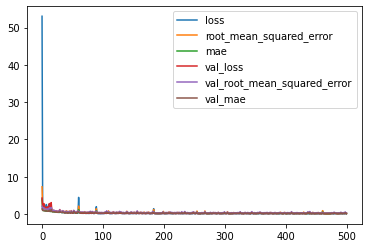

In [178]:
history=pd.DataFrame(model.history.history)
history.plot()

In [179]:
model.evaluate(x_test,y_test)

2347/2347 [==============================] - 13s 6ms/step - loss: 0.0863 - root_mean_squared_error: 0.2937 - mae: 0.1822


[0.08627862483263016, 0.293732225894928, 0.18217352032661438]

In [59]:
testTahminleri=model.predict(x_test)
len(testTahminleri)

75082

In [60]:
tahmin=pd.DataFrame(y_test.values)
testTahminleri= pd.Series(testTahminleri.reshape(75082,))
tahminDf=pd.concat([tahmin,testTahminleri],axis=1)
tahminDf.columns=["Gerçek Değer","Test Sonucu"]

In [61]:
tahminDf.head(20)

,Gerçek Değer,Test Sonucu
0,30.59,30.799782
1,15.06,15.173626
2,3.52,3.629586
3,9.42,9.504416
4,27.98,28.205002
5,26.99,27.014017
6,18.79,18.093611
7,22.17,22.678457
8,20.81,20.598684
9,22.55,22.764643


In [ ]:
#KAYDETME

In [ ]:
model.save('veriler\datathon\models\\datathon007612')

In [ ]:
# SONUCLARI KAYDETME

In [62]:
testTahminleri=model.predict(testSc)
len(testTahminleri)

45504

In [63]:
testTahminleri= pd.Series(testTahminleri.reshape(45504))

In [64]:
testTahminleri.to_csv('veriler\datathon\sonuclar\\datathon0076122.csv')

In [65]:
deneme=pd.read_csv('veriler\datathon\sonuclar\\datathon0076122.csv')

In [66]:
sutunisimler=["id","ürün fiyatı"]
deneme.columns=sutunisimler

In [67]:
deneme.to_csv('veriler\datathon\sonuclar\\datathon007612.csv',index=False)

In [ ]:
#KONTROL

In [68]:
train=pd.read_csv("veriler\datathon\\train.csv")
test=pd.read_csv("veriler\datathon\\testFeatures.csv")

In [69]:
test=test.drop("id",axis=1)

In [71]:
fiyat2021=pd.read_csv("veriler\datathon\sonuclar\\datathon007612.csv")

In [72]:
sutunisimler=["id","ürün fiyatı"]
fiyat2021.columns=sutunisimler
fiyat2021=fiyat2021.drop("id",axis=1)

In [73]:
veri=pd.read_csv("veriler\datathon\\train.csv")

In [74]:
veri2016=train.iloc[:45503,:]
veri2017=train.iloc[45504:91008,:]
veri2018=train.iloc[91008:136512,:]
veri2019=train.iloc[136512:182016,:]
veri2020=train.iloc[182016:,:]

In [75]:
veri2021=pd.concat([fiyat2021,test],axis=1)

In [76]:
veri2021

,ürün fiyatı,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün üretim yeri,market,şehir
0,117.446594,2021-01-01,kıyma,120,et,Yurt içi,M,A
1,38.824978,2021-01-01,tavuk,103,et,Yurt içi,M,A
2,39.103930,2021-01-01,hindi,160,et,Yurt içi,M,A
3,24.652262,2021-01-01,Bakla-kuru,354,sebze ve bakliyat,Yurt içi,M,A
4,41.902905,2021-01-01,Bakla-taze,72,sebze ve bakliyat,Yurt içi,M,A
...,...,...,...,...,...,...,...,...
45499,65.447136,2021-12-01,fındık,110,kuruyemiş,Yurt dışı,B,H
45500,70.385870,2021-12-01,fıstık,115,kuruyemiş,Yurt dışı,B,H
45501,73.389160,2021-12-01,kaju,100,kuruyemiş,Yurt dışı,B,H
45502,68.852080,2021-12-01,badem,110,kuruyemiş,Yurt dışı,B,H


In [77]:
veri2020

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir
182016,2020-01-01,kıyma,120,et,88.52,Yurt içi,M,A
182017,2020-01-01,tavuk,103,et,30.77,Yurt içi,M,A
182018,2020-01-01,hindi,160,et,32.45,Yurt içi,M,A
182019,2020-01-01,Bakla-kuru,354,sebze ve bakliyat,18.04,Yurt içi,M,A
182020,2020-01-01,Bakla-taze,72,sebze ve bakliyat,32.24,Yurt içi,M,A
...,...,...,...,...,...,...,...,...
227515,2020-12-01,fındık,110,kuruyemiş,51.19,Yurt dışı,B,H
227516,2020-12-01,fıstık,115,kuruyemiş,55.14,Yurt dışı,B,H
227517,2020-12-01,kaju,100,kuruyemiş,58.60,Yurt dışı,B,H
227518,2020-12-01,badem,110,kuruyemiş,51.83,Yurt dışı,B,H
